In [1]:
import thesis_plots
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from thesis_plots import mathrm

In [2]:
def get_df(name):
    data = []
    with open(
        os.path.join(thesis_plots.root_folder, 'data', 'planck',name),
        'r') as file:
        for l in file:
            if l.startswith('#'):
                headers = l.split()[1:]
                continue
    #         print(l.split())
    #         break
            data.append([float(f) for f in l.split()])
    return pd.DataFrame(data, columns=headers)


In [3]:
df = pd.concat(
    [get_df('COM_PowerSpect_CMB-TT-full_R3.01.txt')[:29], 
     get_df('COM_PowerSpect_CMB-TT-binned_R3.01.txt')]
)
data = df.values.T

In [4]:
data_fit = get_df('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt').values.T

In [5]:
thesis_plots.setup_plt()

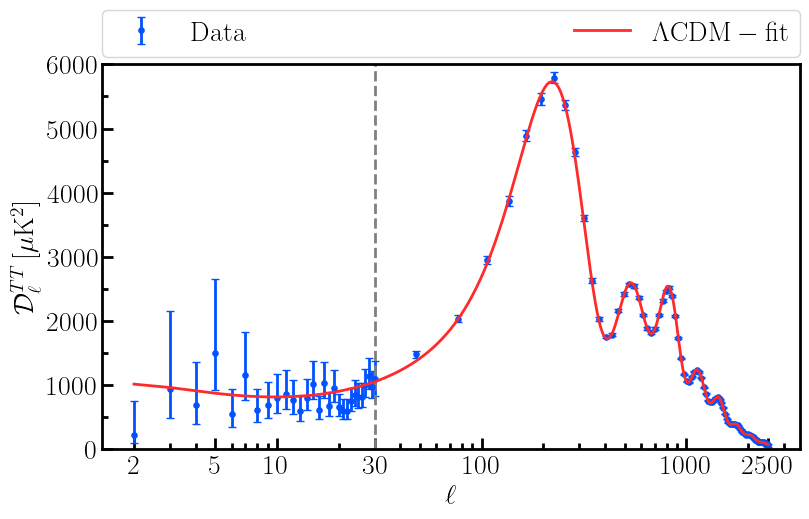

In [6]:
plt.figure(figsize=(9,5))
kw = dict(ls='', capsize=3, marker='.', markersize=7.5)
plt.plot([], [])
plt.errorbar(data[0], data[1], yerr=[data[2], data[3]], **kw, label=mathrm('Data'))
plt.plot(data_fit[0], data_fit[1], zorder=10, marker='', label='$\Lambda$'+mathrm('CDM-fit'))

# plt.plot(data[0], data[-1])
plt.xscale('log')
plt.gca().set_xticks(xs:=[2, 5, 10, 30, 100, 1000, 2500], [mathrm(str(i)) for i in xs])
plt.axvline(30, ls='--', c='gray') 
plt.ylabel('$\mathcal{D}_\ell^{TT}\,[\mu \mathrm{K}^2]$')
plt.xlabel('$\ell$')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], **thesis_plots.legend_kw(ncol=3))
plt.ylim(0,6000)
plt.gca().set_yticks(range(0,6000,500), minor=True);
thesis_plots.save_fig('planck_cdm')

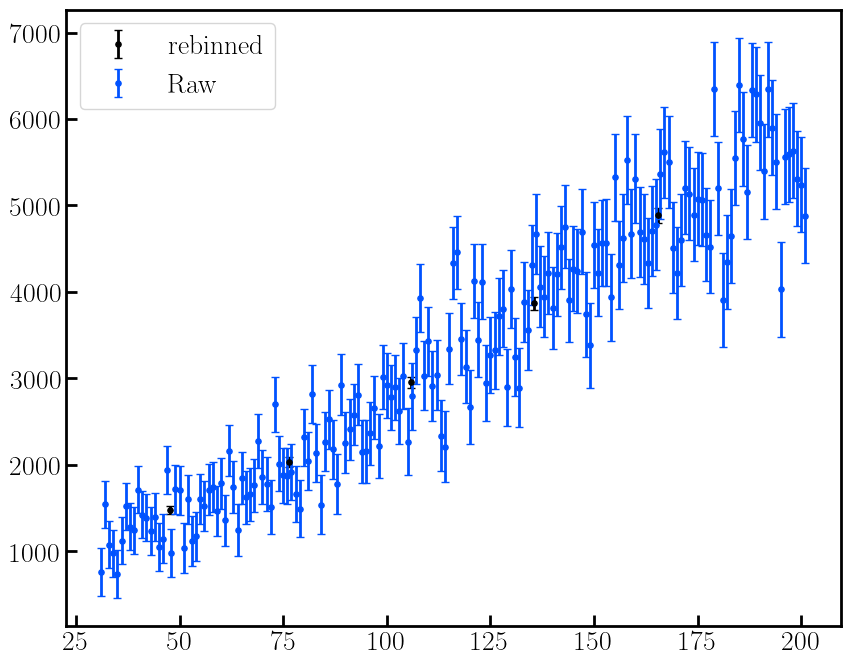

In [7]:
data = get_df('COM_PowerSpect_CMB-TT-binned_R3.01.txt')[:5].values.T
plt.errorbar(data[0], data[1], yerr=[data[2], data[3]], **kw, label=mathrm('rebinned'))

data = get_df('COM_PowerSpect_CMB-TT-full_R3.01.txt')[29:200].values.T
plt.errorbar(data[0], data[1], yerr=[data[2], data[3]], **kw, label=mathrm('Raw'))
plt.legend()